## Regressão Linear Univariada - Aprendizado Supervisionado

Prof: Nielsen Rechia

### Autores: 
Roberto Coutinho  
Thais Galho

### Atividade:  Implementar uma regressão linear para prever qual o lucro, tendo como base o tamanho da população de um determinado local, com o dataset Regressão Univariada -> ex1data1.csv

##### Requisitos
- Defina uma % do conjunto de dados para treino e teste (sugestão 50% 50%)   
- Inicie os parâmetros theta 0 e theta 1 de forma randômica   
- Defina a taxa de aprendizado inicial   
- Atualize os pesos   
- Realize o processo até atingir convergência (diferença no custo de uma iteração para a outra não é significativa) 
 

### Imports

In [38]:
#encoding=utf-8
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import euclidean_distances

In [39]:
df = pd.read_csv('ex1data1.csv', nrows=None, index_col=None)
print str(len(df)) + ' records'
df.head()

97 records


,populacao,lucro
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [53]:
X =  np.array(df['populacao'], dtype=float)
y = np.array(df['lucro'],dtype=float)

# utiliza 50% do dataset para teste
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.50, test_size=0.50)



In [52]:
t0 = 0.  # altere os pesos aqui
t1 = 0  # altere os pesos aqui

X, fx = np.array(df['populacao'], dtype=float), np.array(df['lucro'], dtype=float)  # conjuntos X e y

In [15]:
def hypothesis(x, t0, t1):
    return t0 + t1 * x

In [16]:
def cost_function(X, fx, h, t0, t1):
    soma = 0.
    N = len(X)
    
    for i in range(N):
        soma += (h(X[i], t0, t1) - fx[i]) ** 2.
    
    return (1./(2. * float(N))) * soma

In [17]:
print cost_function(X, fx, hypothesis, t0, t1)

32.072733877455654


### Projetando as predições

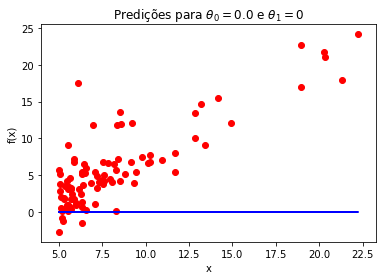

In [18]:
plt.plot(X, [hypothesis(x, t0, t1) for x in X], c='blue')
plt.scatter(X, fx, c='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(u'Predições ' + r'para $\theta_0=$' + str(t0) + r' e $\theta_1=$' + str(t1))
plt.show()

### Projetando o gráfico de custos

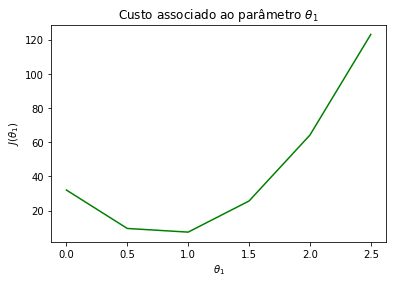

In [19]:
t0s = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
t1s = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5]
plt.plot(t1s, [cost_function(X, fx, hypothesis, a, b) for a, b in zip(t0s, t1s)], c='green')
plt.xlabel(r'$\theta_1$')
plt.ylabel(r'$J(\theta_1)$')
plt.title(u'Custo associado ao parâmetro ' + r'$\theta_1$')
plt.show()

***

### Atualização de pesos

In [20]:
def update_t0(X, fx, h, t0, t1, alpha):
    """
    Atualiza t0 com base nos N valores passados para esta função.
    """
    
    N = len(X)
    soma = 0.
    
    for i in range(N):
        soma += (h(X[i], t0, t1) - fx[i])
    
    return t0 - ((alpha * (1./float(N))) * soma)


def update_t1(X, fx, h, t0, t1, alpha):
    """
    Atualiza t1 com base nos N valores passados para esta função.
    """
    N = len(X)
    
    soma = 0.
    for i in range(N):
        soma += (h(X[i], t0, t1) - fx[i]) * X[i]
    
    return t1 - ((alpha * (1./float(N))) * soma)

In [22]:
# redefinindo os valores aqui, por conveniência

t0 = 0.1
t1 = 1.
alpha = 0.5
X, fx = np.array(df['populacao'], dtype=float), np.array(df['lucro'], dtype=float)

temp0 = update_t0(X, fx, hypothesis, t0, t1, alpha)
temp1 = update_t1(X, fx, hypothesis, t0, t1, alpha)

print 'antigo theta0: %f novo theta0: %f' % (t0, temp0)
print 'antigo theta1: %f novo theta1: %f' % (t1, temp1)

antigo theta0: 0.100000 novo theta0: -1.110332
antigo theta1: 1.000000 novo theta1: -7.445537


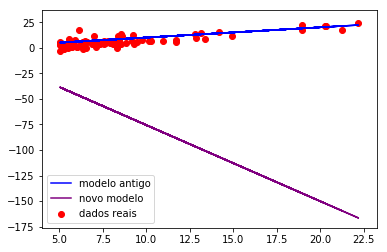

In [25]:
plt.plot(X, [hypothesis(x, t0, t1) for x in X], label=u'modelo antigo', c='blue')
plt.plot(X, [hypothesis(x, temp0, temp1) for x in X], label=u'novo modelo', c='purple')
plt.scatter(X, fx, label='dados reais', c='red')
plt.legend(loc='lower left')
plt.show()

### Regressão Linear univariada (processo completo)


In [27]:
# redefinindo os valores aqui, por conveniência

t0 = 0.1  # theta 0
t1 = 1.  # theta 1
alpha = 0.1  # taxa de aprendizado
X, fx = np.array(df['populacao'], dtype=float), np.array(df['lucro'], dtype=float) # X e fx
threshold = 0.001  # diferença aceitável entre custos
batch_size = 2  # tamanho do batch
epoch = 0
max_epoch = 10  # máximo número de iterações permitido


prev = np.inf  # custo anterior
curr = cost_function(X, fx, hypothesis, t0, t1)  # custo atual
while (abs(curr - prev) > threshold) and (epoch < max_epoch):
    bc = 0  # contador de quantas instâncias passaram pelo batch
    
    for i in range(batch_size):
        X_local = X[bc:(bc + batch_size)]
        fx_local = fx[bc:(bc + batch_size)]
        
        temp0 = update_t0(X_local, fx_local, hypothesis, t0, t1, alpha)
        temp1 = update_t1(X_local, fx_local, hypothesis, t0, t1, alpha)
        
        t0 = temp0
        t1 = temp1
        
        bc += 1
    
    prev = curr
    curr = cost_function(X, fx, hypothesis, t0, t1)
    print 'custo na época %d: %f' % (epoch, curr)
    epoch += 1


custo na época 0: 10264.882675
custo na época 1: 1409980.445080
custo na época 2: 160790178.410261
custo na época 3: 18033360573.194538
custo na época 4: 2019353173107.301270
custo na época 5: 226091032836309.562500
custo na época 6: 25313271460303196.000000
custo na época 7: 2834083459927512064.000000
custo na época 8: 317305017419365285888.000000
custo na época 9: 35525585006922962042880.000000


# Exercício

custo na época 0: 103588707294442984476508160.000000
custo na época 1: 210913074974230844302020487193006093025411072.000000
custo na época 2: 429432187705221381466682854631615852829267553791090438485049344.000000
custo na época 3: 874350743119285322999469412977428921396838169995201328910104714605723665397972992.000000
custo na época 4: 1780232697689677972918878929697583774559529460827968382287878341381618024228319069495099064374525952.000000
custo na época 5: 3624664910350629560788043173843348001736169531152234270006127173320984592911724384860971539100894293583263679245189120.000000
custo na época 6: 7380044041083734427718418142607935444427123381756209549368906284624200702321509843911008857930361587709070297955895857264529024563019776.000000
custo na época 7: 15026230395202778597634680778892555333248395060284269946443786612393864566905403112109307140121094727278655624726291413429562314661291466775767530556358656.000000
custo na época 8: 3059434315470010733059806806809748705906832876058